## Basic classification: Classify images of hand written digits
https://github.com/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb

In [137]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)

### Import the MNIST dataset

In [138]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [139]:
class_names = ['zero', 'one', 'two', 'three', 'four',
                'five', 'six', 'seven', 'eight', 'nine']

### Explore the data

In [140]:
train_images.shape

(60000, 28, 28)

In [141]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [142]:
test_images.shape

(10000, 28, 28)

In [143]:
len(test_labels)

10000

### Preprocess the data

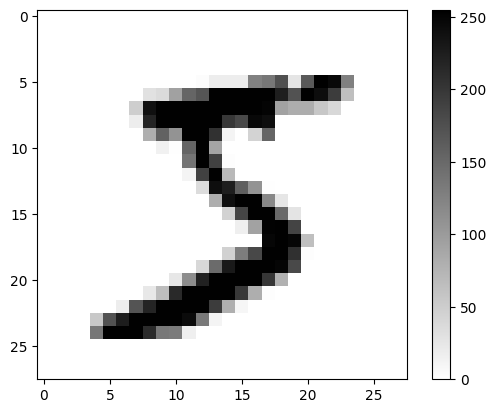

In [144]:
plt.figure()
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [145]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [146]:
train_images = train_images / 255.0
test_images = test_images / 255.0

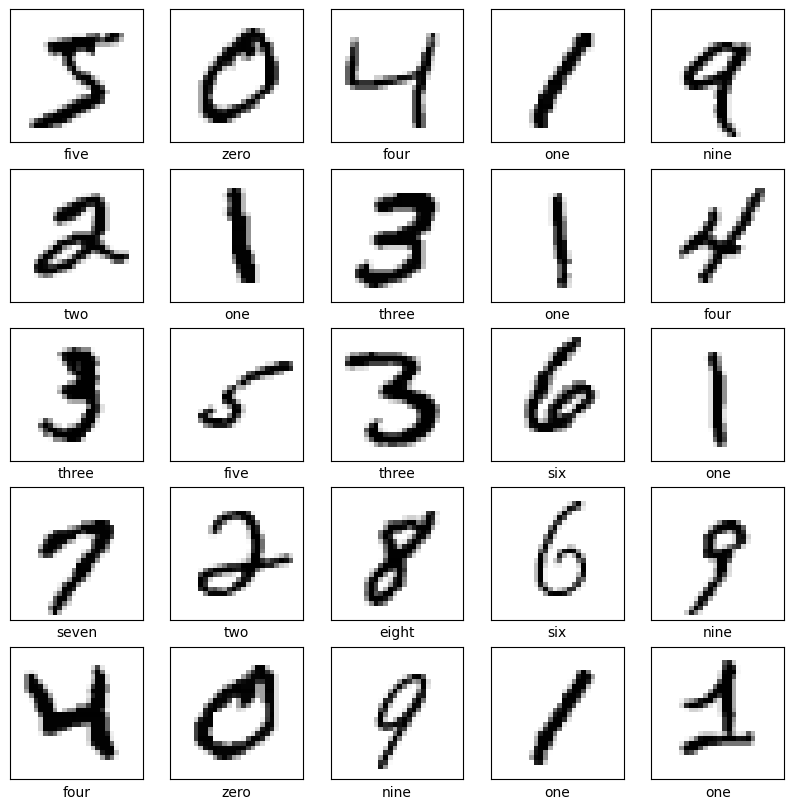

In [147]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [148]:
#train_images = train_images.reshape(60000, 784).astype('float32')
#test_images = test_images.reshape(10000, 784).astype('float32')

In [149]:
n_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, n_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, n_classes)

In [150]:
train_images.shape

(60000, 28, 28)

## Build the model
### Set up the layers

In [151]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [152]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
(64*784)

50176

In [154]:
(64*784)+64

50240

In [155]:
(10*64)+10

650

### Compile the model

In [156]:

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

### Train the model
#### Feed the model

In [157]:
model.fit(train_images, train_labels, batch_size=128, epochs=100, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0573 - loss: 0.0936 - val_accuracy: 0.0701 - val_loss: 0.0927
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0768 - loss: 0.0923 - val_accuracy: 0.0981 - val_loss: 0.0917
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1065 - loss: 0.0914 - val_accuracy: 0.1264 - val_loss: 0.0910
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1347 - loss: 0.0908 - val_accuracy: 0.1521 - val_loss: 0.0904
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1617 - loss: 0.0902 - val_accuracy: 0.1744 - val_loss: 0.0899
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1818 - loss: 0.0898 - val_accuracy: 0.1927 - val_loss: 0.0895
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2024 - loss: 0.0894 - val_accuracy: 0.2091 - val_loss: 0.0891
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2168 - loss: 0.0891 - val_accu

#### Evaluate accuracy

In [158]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.7589 - loss: 0.0486

Test accuracy: 0.758899986743927


### Make predictions

In [159]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step


In [160]:
predictions[0]

array([0.01580813, 0.02216819, 0.01915867, 0.02689212, 0.04921452,
       0.02432038, 0.01465708, 0.7197605 , 0.02884695, 0.07917358],
      dtype=float32)

In [161]:
np.argmax(predictions[0])

7

In [162]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [163]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label_int = np.argmax(true_label)  # Fix: get integer label

  if predicted_label == true_label_int:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label_int]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  true_label_int = np.argmax(true_label)  # Fix: get integer label

  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label_int].set_color('blue')

#### Verify predictions

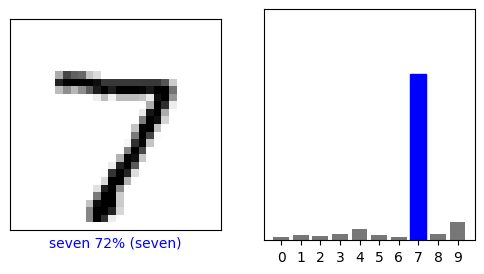

In [164]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

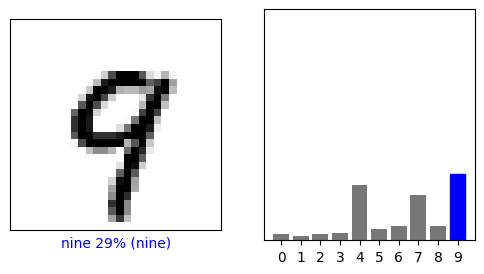

In [165]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

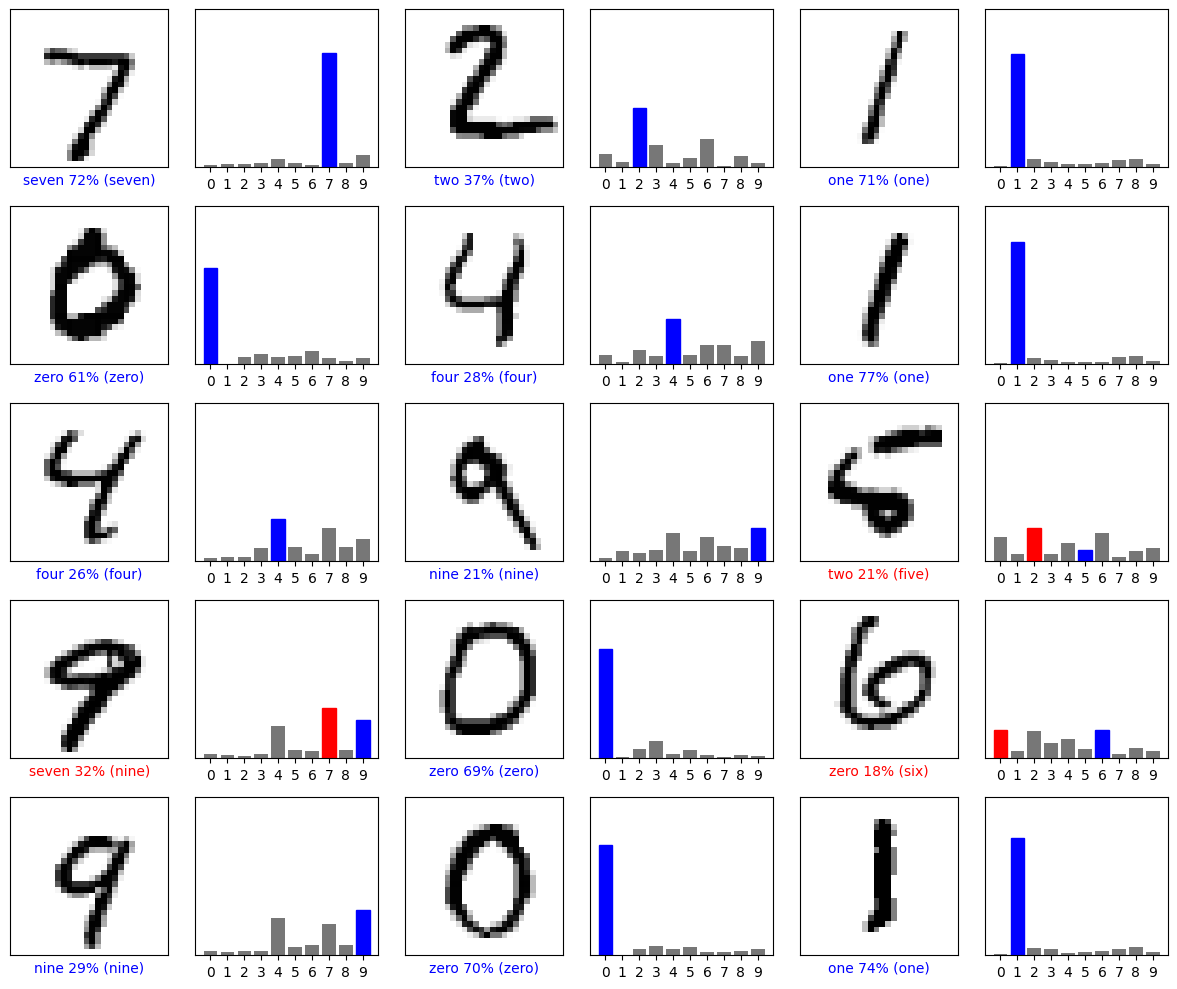

In [166]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model

In [167]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [168]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [169]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.08300284 0.03467581 0.37141544 0.14014067 0.02672979 0.05673795
  0.17824332 0.01074327 0.07256328 0.02574751]]


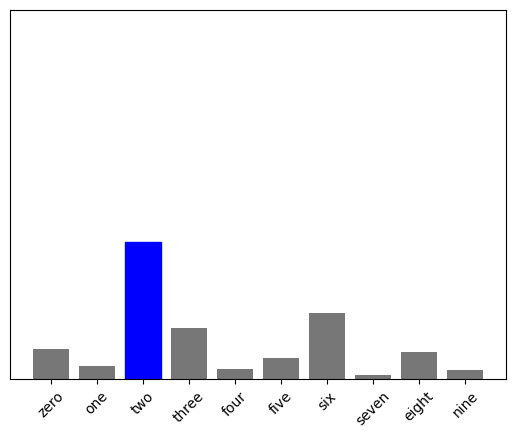

In [170]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [171]:
np.argmax(predictions_single[0])

2